In [166]:
''' converts .off file to vertex.js and faces.js '''
import sys

def split_and_rejoin(vert):
    splt = vert.split(" ")
    return "[" +  ",".join(splt)[:-1] + "],\n"

# fn = sys.argv[0]
# print fn
# n = sys.argv[1]

fn = '/home/nick/github/CSCI480/p4/saved_from_gui.obj'
n = 'saved_from_gui'

In [167]:
with open(fn, 'r') as f:
    lines = f.readlines()[1:]

In [168]:
vertices = []
normals = []
parameters = []
textures = []
faces = []
for line in lines: #lines[:8182]:
    if 'v ' in line:
        vertices.append(line)
    elif 'vn ' in line:
        normals.append(line)
    elif 'vt ' in line:
        textures.append(line)
    elif 'f ' in line:
        faces.append(line)
    elif 'vp ' in line:
        parameters.append(line)
    else:
        print line
# lines[8174:8182]

#

# OBJ File Generated by Meshlab

#

####

# Object saved_from_gui.obj

#

# Vertices: 5455

# Faces: 10906

#

####

# 5455 vertices, 0 vertices normals



# 10906 faces, 0 coords texture





In [169]:
print 'len(vertices) : {}'.format(len(vertices))
print 'len(faces) : {}'.format(len(faces))
print 'len(textures) : {}'.format(len(textures))
print 'len(parameters) : {}'.format(len(parameters))
print 'len(normals) : {}'.format(len(normals))
vertices[:5]


len(vertices) : 5455
len(faces) : 10907
len(textures) : 0
len(parameters) : 0
len(normals) : 5455


['v -16.000000 -97.500000 6.000000\n',
 'v -16.000000 -97.687500 2.000000\n',
 'v -14.000000 -97.166664 8.000000\n',
 'v -18.000000 -97.187500 -2.000000\n',
 'v -18.000000 -96.047623 10.000000\n']

In [170]:
def parse_lines(lines):
    lines = map(lambda x: x[2:].strip().split(" "),lines)
    return map(lambda x: map(float,x),lines)

def parse_faces(f):
    f = map(lambda x: x[2:].strip().split(" "),f)
    for i in xrange(len(f)):
        f[i] = [x.replace('End','').split('//')  for x in f[i]]
        
#     f = map(lambda x: map(lambda x: [int(n) for n in x.replace('End','').split('//')],x),f)
    
    return f
    

parsed_v = parse_lines(vertices)
parsed_t = parse_lines(textures)
parsed_n= parse_lines(normals)
parsed_f = parse_faces(faces[:-1])


In [171]:
js_vertices = "V = ["
for v in parsed_v:
    js_vertices += str(v) + ',\n'

js_vertices = js_vertices[:-2] + "];"

with open("./script_setup/{}_vtx.js".format(n),"w") as f:
    f.write(js_vertices)
    
    

In [172]:
js_faces = "F = ["
for f in parsed_f:
    js_faces += str([f[0] for f in f]) + ',\n'
js_faces = js_faces[:-2] + "];"

with open("./script_setup/{}_fce.js".format(n),"w") as f:
    f.write(js_faces)

In [17]:
from nilearn import plotting as nip
import nibabel as nib
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
f = nib.load('/home/nick/github/CSCI480/p4/nii_to_js/white.nii')

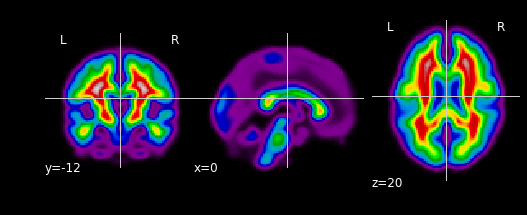

In [20]:

nip.plot_epi(f)